In [382]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Loading Cleaned Data

In [383]:
df = pd.read_csv('../../datasets/apartments_collective.csv')

# Data Processing for Machine Learning

In [384]:
df.head(50)

,Unnamed: 0,url,name/title,address,price,area,price-per-area,floor/store,no of floors/stores in the building,no of rooms,year of construction,parking space,market,form of ownership,location,latitude,longitude,distance,district
0,0,https://krakow.nieruchomosci-online.pl/mieszka...,Mieszkanie Kraków,"103171, Mistrzejowice, Kraków, małopolskie",1087000.0,74.80,14532.09,6,7,3,2016.0,True,wtórny,pełna własność,"Mistrzejowice, Kraków, województwo małopolskie...",50.097426,20.009603,6.500728,Mistrzejowice
1,1,https://krakow.nieruchomosci-online.pl/mieszka...,Mieszkanie Kraków,"2 Pułku Lotniczego, Kraków, małopolskie",550000.0,32.00,17187.50,4,8,1,2012.0,False,wtórny,pełna własność,"2, Osiedle 2 Pułku Lotniczego, Czyżyny, Kraków...",50.077806,20.012307,5.639111,Czyżyny
2,2,https://krakow.nieruchomosci-online.pl/mieszka...,Mieszkanie Kraków,"2 Pułku Lotniczego, Kraków, małopolskie",550000.0,32.30,17028.00,4,10,1,1985.0,False,wtórny,pełna własność,"2, Osiedle 2 Pułku Lotniczego, Czyżyny, Kraków...",50.077806,20.012307,5.639111,Czyżyny
3,3,https://krakow.nieruchomosci-online.pl/mieszka...,"Apartament, ul. 28 Lipca 1943","28 Lipca 1943, Wola Justowska, Kraków, małopol...",2290000.0,155.16,14758.96,0,2,5,2009.0,True,wtórny,pełna własność,"28 Lipca 1943, Wola Justowska, Zwierzyniec, Kr...",50.062710,19.872002,4.662523,Zwierzyniec
4,4,https://krakow.nieruchomosci-online.pl/mieszka...,"Mieszkanie, ul. 28 Lipca 1943","28 Lipca 1943, Wola Justowska, Kraków, małopol...",2399000.0,139.00,17258.99,1,2,3,2022.0,False,wtórny,pełna własność,"28 Lipca 1943, Wola Justowska, Zwierzyniec, Kr...",50.062710,19.872002,4.662523,Zwierzyniec
5,5,https://krakow.nieruchomosci-online.pl/mieszka...,"Apartament, ul. 28 Lipca 1943","28 Lipca 1943, Wola Justowska, Kraków, małopol...",2399000.0,146.68,16355.33,2,2,3,2002.0,True,wtórny,pełna własność,"28 Lipca 1943, Wola Justowska, Zwierzyniec, Kr...",50.062710,19.872002,4.662523,Zwierzyniec
6,6,https://www.otodom.pl/pl/oferta/nowe-mieszkani...,Nowe mieszkania na Górce Narodowej,"29 listopada - okolice, Górka Narodowa, Prądni...",778689.0,61.30,12703.00,1,5,2,2023.0,True,pierwotny,pełna własność,"Aleja 29 Listopada, Górka Narodowa, Prądnik Bi...",50.103296,19.963896,4.983478,Prądnik Biały
7,8,https://www.otodom.pl/pl/oferta/balkon-3-pokoj...,balkon + 3 pokoje + parking,"Adama Vetulaniego, Prądnik Biały, Prądnik Biał...",970000.0,55.00,17636.00,4,7,3,2023.0,True,wtórny,pełna własność,"Adama Vetulaniego, Prądnik Biały, Kraków, woje...",50.095951,19.924784,3.895335,Prądnik Biały
8,9,https://krakow.nieruchomosci-online.pl/mieszka...,"Kawalerka, ul. Agatowa","Agatowa 18, Bieżanów, Kraków, małopolskie",410000.0,28.00,14642.86,0,2,1,1997.0,False,wtórny,spółdzielcze wł. prawo do lokalu,"18, Agatowa, Złocień, Bieżanów-Prokocim, Krakó...",50.021853,20.050650,9.235760,Bieżanów-Prokocim
9,10,https://krakow.nieruchomosci-online.pl/mieszka...,"Mieszkanie, ul. Agatowa","Agatowa, Bieżanów, Kraków, małopolskie",765000.0,48.00,15937.50,3,4,3,2023.0,True,wtórny,pełna własność,"Agatowa, Osiedle Kolejowe, Złocień, Bieżanów-P...",50.022046,20.046131,8.943634,Bieżanów-Prokocim


In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17932 entries, 0 to 17931
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           17932 non-null  int64  
 1   url                                  17932 non-null  object 
 2   name/title                           17932 non-null  object 
 3   address                              17932 non-null  object 
 4   price                                17932 non-null  float64
 5   area                                 17932 non-null  float64
 6   price-per-area                       17932 non-null  float64
 7   floor/store                          17932 non-null  int64  
 8   no of floors/stores in the building  17932 non-null  int64  
 9   no of rooms                          17932 non-null  int64  
 10  year of construction                 17932 non-null  float64
 11  parking space               

In [386]:
# Droping columns unnecessary/harmfull to model performance
columns_to_drop = ['Unnamed: 0', 'url', 'name/title', 'address', 'location', 'latitude', 'longitude', 'price']

df = df.drop(columns=columns_to_drop)

In [387]:
df.head()

,area,price-per-area,floor/store,no of floors/stores in the building,no of rooms,year of construction,parking space,market,form of ownership,distance,district
0,74.80,14532.09,6,7,3,2016.0,True,wtórny,pełna własność,6.500728,Mistrzejowice
1,32.00,17187.50,4,8,1,2012.0,False,wtórny,pełna własność,5.639111,Czyżyny
2,32.30,17028.00,4,10,1,1985.0,False,wtórny,pełna własność,5.639111,Czyżyny
3,155.16,14758.96,0,2,5,2009.0,True,wtórny,pełna własność,4.662523,Zwierzyniec
4,139.00,17258.99,1,2,3,2022.0,False,wtórny,pełna własność,4.662523,Zwierzyniec


# Verifying Data Cleaning Process / Adapting data to model

## Missing Data

In [388]:
df.isnull().sum()

area                                   0
price-per-area                         0
floor/store                            0
no of floors/stores in the building    0
no of rooms                            0
year of construction                   0
parking space                          0
market                                 0
form of ownership                      0
distance                               0
district                               0
dtype: int64

## Outliers handling

In [389]:
df.describe().round(2)

,area,price-per-area,floor/store,no of floors/stores in the building,no of rooms,year of construction,distance
count,17932.00,17932.00,17932.00,17932.00,17932.00,17932.00,17932.00
mean,56.99,16813.15,2.35,4.79,2.59,2003.31,4.37
std,28.14,4701.30,2.12,2.41,1.06,35.30,2.50
min,10.27,19.14,-1.00,1.00,1.00,1300.00,0.04
25%,39.50,14000.00,1.00,3.00,2.00,2000.00,2.46
50%,51.01,16200.00,2.00,4.00,2.00,2018.00,3.99
75%,66.00,18611.03,3.00,6.00,3.00,2023.00,6.11
max,550.00,152594.09,15.00,18.00,44.00,2026.00,18.93


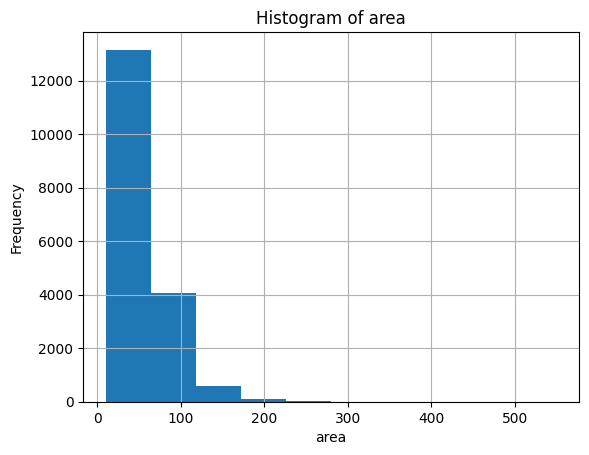

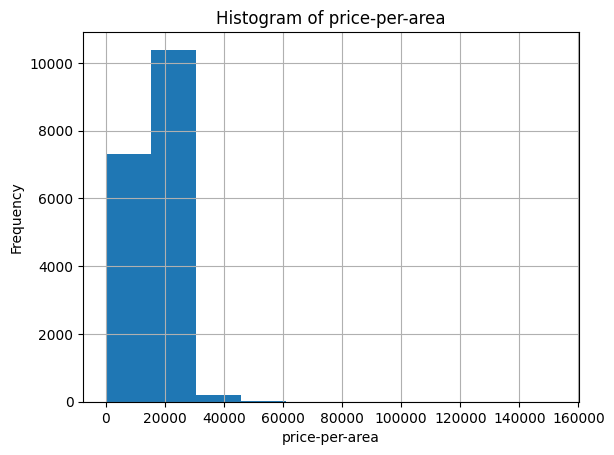

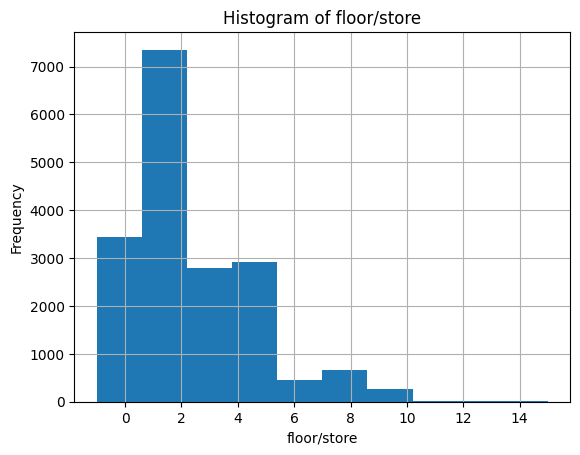

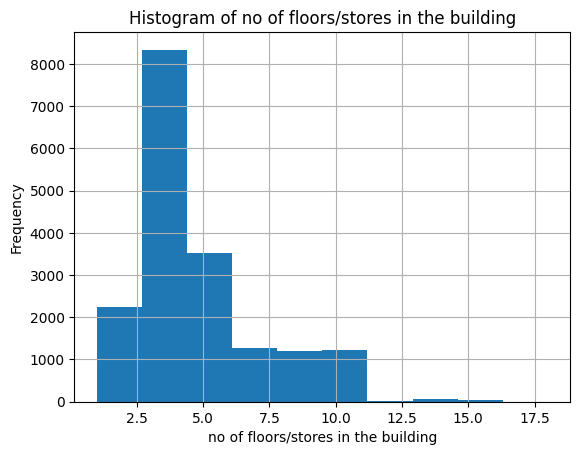

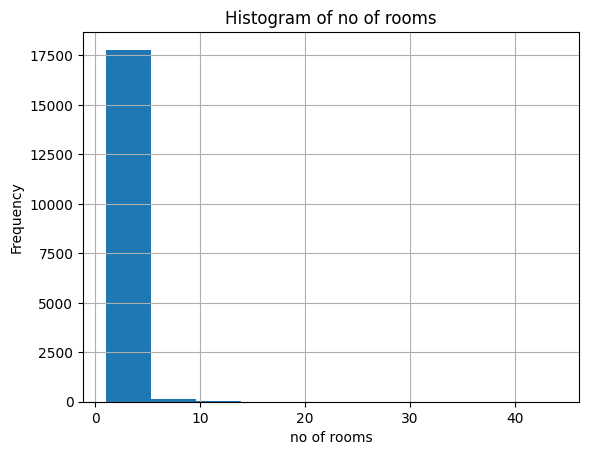

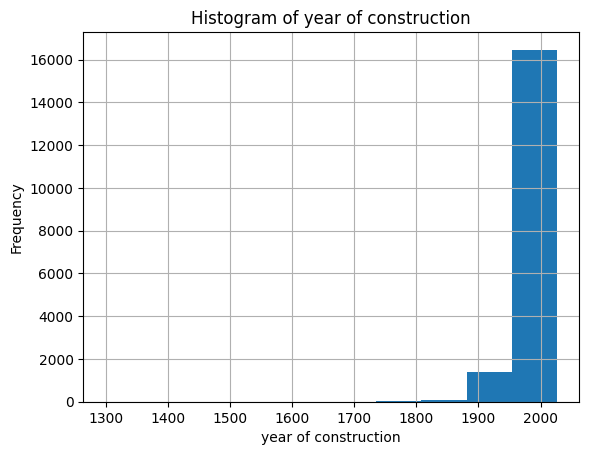

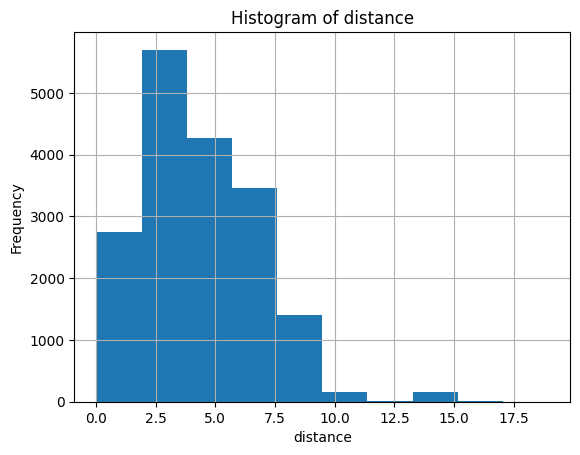

In [390]:
for column in df.select_dtypes(include=['number']).columns:
    plt.figure()
    df[column].plot(kind='hist', bins=10, title=f'Histogram of {column}')
    plt.xlabel(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [391]:
df.describe().round(2)

,area,price-per-area,floor/store,no of floors/stores in the building,no of rooms,year of construction,distance
count,17932.00,17932.00,17932.00,17932.00,17932.00,17932.00,17932.00
mean,56.99,16813.15,2.35,4.79,2.59,2003.31,4.37
std,28.14,4701.30,2.12,2.41,1.06,35.30,2.50
min,10.27,19.14,-1.00,1.00,1.00,1300.00,0.04
25%,39.50,14000.00,1.00,3.00,2.00,2000.00,2.46
50%,51.01,16200.00,2.00,4.00,2.00,2018.00,3.99
75%,66.00,18611.03,3.00,6.00,3.00,2023.00,6.11
max,550.00,152594.09,15.00,18.00,44.00,2026.00,18.93


In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17932 entries, 0 to 17931
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   area                                 17932 non-null  float64
 1   price-per-area                       17932 non-null  float64
 2   floor/store                          17932 non-null  int64  
 3   no of floors/stores in the building  17932 non-null  int64  
 4   no of rooms                          17932 non-null  int64  
 5   year of construction                 17932 non-null  float64
 6   parking space                        17932 non-null  bool   
 7   market                               17932 non-null  object 
 8   form of ownership                    17932 non-null  object 
 9   distance                             17932 non-null  float64
 10  district                             17932 non-null  object 
dtypes: bool(1), float64(4), int6

In [393]:
# JAK TO DODAJE TO CAŁY KOD W PIZDU I NIE WIEM DLACZEGO, CHAT GPT TEZ NIE OGARNIA
condition1 = df['area'] > 200
condition2 = df['price-per-area'] > 60000
condition3 = df['no of rooms'] > 10
condition4 = (df['year of construction'] <= 1800)

outlier_conditions = condition1 | condition2 | condition3 | condition4

outlier_count = df[outlier_conditions].shape[0]
print("Number of outliers:", outlier_count)

Number of outliers: 117


In [394]:
df.shape

(17932, 11)

In [395]:
# Removing Outliers (approximately 0.65%)
df = df[~outlier_conditions]

In [396]:
df.shape

(17815, 11)

In [397]:
# for column in df.select_dtypes(include=['number']).columns:
#     plt.figure()
#     df[column].plot(kind='hist', bins=10, title=f'Histogram of {column}')
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.grid(True)
#     plt.show()

In [398]:
# df.describe().round(2)

# One Hot Encoding

In [399]:
encoder = OneHotEncoder()

categorical_columns = ['market', 'form of ownership', 'district']
categorical_data = df[categorical_columns]


encoded_data = encoder.fit_transform(categorical_data)
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out())

df.drop(columns=categorical_columns, inplace=True)
df_encoded = pd.concat([df, encoded_df], axis=1)

In [400]:
df_encoded.head()

,area,price-per-area,floor/store,no of floors/stores in the building,no of rooms,year of construction,parking space,distance,market_pierwotny,market_wtórny,...,district_Nowa Huta,district_Podgórze,district_Podgórze Duchackie,district_Prądnik Biały,district_Prądnik Czerwony,district_Stare Miasto,district_Swoszowice,district_Wzgórza Krzesławickie,district_Zwierzyniec,district_Łagiewniki-Borek Fałęcki
0,74.80,14532.09,6.0,7.0,3.0,2016.0,True,6.500728,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32.00,17187.50,4.0,8.0,1.0,2012.0,False,5.639111,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32.30,17028.00,4.0,10.0,1.0,1985.0,False,5.639111,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,155.16,14758.96,0.0,2.0,5.0,2009.0,True,4.662523,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,139.00,17258.99,1.0,2.0,3.0,2022.0,False,4.662523,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [401]:
df_encoded.to_csv('model_data.csv', index=False)

print("Data has been successfully saved to 'model_data.csv'.")

Data has been successfully saved to 'model_data.csv'.


# Train/Test split

In [402]:
X = df_encoded.drop('price-per-area', axis=1)
y = df_encoded['price-per-area']

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f'Training set size: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Testing set size: X_test: {X_test.shape}, y_test: {y_test.shape}')

Training set size: X_train: (14344, 31), y_train: (14344,)
Testing set size: X_test: (3587, 31), y_test: (3587,)


# Experiments Result - TESTS

In [404]:
import torch
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

1
NVIDIA GeForce RTX 4070


In [405]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if device.type == 'cuda':
    print('Code is being executed using CUDA [GPU] - OK!\n'f'Using GPU Device: {torch.cuda.get_device_name(device)}')
else:
    print('Code is being executed using CPU - SLOW!')

Code is being executed using CUDA [GPU] - OK!
Using GPU Device: NVIDIA GeForce RTX 4070


In [406]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import train_test_split

In [407]:
MODELS_DICT = {
    'Lasso': Lasso(),
    'DT': DecisionTreeRegressor(),
    'RF': RandomForestRegressor(),
    'SVR': SVR(),
    'LGB': LGBMRegressor(),
    'GBM': GradientBoostingRegressor(),
    'XGB': XGBRegressor()
}

MODELS_PARAMS = {
    'Lasso': [
        {
            'regressor_model__random_state': Categorical([0]),
            'regressor_model__alpha': Real(1e-4, 1.0, prior='log-uniform')
        }],
    'DT': [
        {
            'regressor_model__random_state': Categorical([0]),
            'regressor_model__max_depth': Integer(3, 17),
            'regressor_model__min_samples_leaf': Integer(10, 100),
            'regressor_model__min_samples_split': Integer(2, 50),
            'regressor_model__max_features': Categorical(['sqrt', 'log2', None]),
        }
    ],
    'RF': [
        {
            'regressor_model__random_state': Categorical([0]),
            'regressor_model__n_estimators': Integer(200, 1500),
            'regressor_model__max_depth': Integer(3, 17),
            'regressor_model__min_samples_leaf': Integer(10, 50),
            'regressor_model__min_samples_split': Integer(3, 20),
            'regressor_model__max_features': Categorical(['sqrt', 'log2', None])
        }
    ],
    'GBM': [
        {
            'regressor_model__random_state': Categorical([0]),
            'regressor_model__n_estimators': Integer(2000, 6000),
            'regressor_model__learning_rate': Real(0.01, 0.05),
            'regressor_model__max_depth': Integer(2, 6),
            'regressor_model__max_features': Categorical(['sqrt']),
            'regressor_model__min_samples_leaf': Integer(10, 20),
            'regressor_model__min_samples_split': Integer(10, 20),
            'regressor_model__loss': Categorical(['huber'])
        }
    ],
    'LGB': [
        {
            'regressor_model__random_state': Categorical([0]),
            'regressor_model__num_leaves': Integer(5, 20),
            'regressor_model__n_estimators': Integer(2000, 6000),
            'regressor_model__learning_rate': Real(1e-2, 1e-1),
            'regressor_model__verbose': Integer(-10, 10),
            'regressor_model__max_bin': Integer(50, 250),
            'regressor_model__bagging_fraction': Real(0.1, 1),
            'regressor_model__bagging_freq': Integer(2, 10),
            'regressor_model__bagging_seed': Integer(1, 10),
            'regressor_model__feature_fraction': Real(0.1, 1),
            'regressor_model__feature_fraction_seed': Integer(1, 10),
            'regressor_model__objective': Categorical(['regression'])
        }],
    'XGB': [
        {
            'regressor_model__random_state': Categorical([0]),
            'regressor_model__n_estimators': Integer(2000, 6000),
            'regressor_model__learning_rate': Real(0.01, 0.05),
            'regressor_model__max_depth': Integer(2, 6),
            'regressor_model__min_child_weight': Real(0, 0.5),
            'regressor_model__subsample': Real(0.5, 1.0, prior='uniform'),
            'regressor_model__reg_alpha': Real(0.01, 1),
            'regressor_model__reg_lambda': Real(0, 1),
            'regressor_model__gamma': Real(0, 0.05),
            'regressor_model__colsample_bytree': Real(0.2, 1),
            'regressor_model__nthread': Categorical([-1])
        }
    ],
}

In [408]:
def run_experiments(model_names_list, n_iter):
    print('Loading models...')
    model_dict = {}

    dataset = 'model_data.csv'
    try:
        df = pd.read_csv(dataset)
        x = df.drop('price-per-area', axis=1)
        y = df['price-per-area']

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

        for model_name in model_names_list.split(','):
            assert model_name in MODELS_DICT.keys(), f'Unknown model_name: {model_name}'
            model = MODELS_DICT[model_name]
            model_dict[model_name] = model

        for model_name, model in model_dict.items():
            print(f'Running experiments for {model_name}')
            pipe = Pipeline([('scaler', StandardScaler()), ('regressor_model', model)])
            opt = BayesSearchCV(
                pipe,
                MODELS_PARAMS[model_name],
                n_iter=n_iter,
                random_state=7,
                verbose=True
            )
            opt.fit(x_train, y_train)

            best_score = opt.score(x_test, y_test)
            best_params = opt.best_params_

            result_df = pd.DataFrame([{**{'Model': model_name, 'Score': best_score}, **best_params}])
            result_df.to_csv(f'reports/model_results_{model_name}.csv', index=False)

    except Exception as e:
        print(f'An error occurred: {e}')

In [409]:
#TODO różne proporcje train/test, with/without outliers, different variance of iterations

# Linear Regression - as a starting point

In [410]:
from sklearn.linear_model import LinearRegression
df_encoded = pd.read_csv('model_data.csv')

X = df_encoded.drop('price-per-area', axis=1)
y = df_encoded['price-per-area']

C:\Users\User\AppData\Local\Temp\ipykernel_17092\1416159765.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_encoded = pd.read_csv('model_data.csv')


In [411]:
model = LinearRegression()
model.fit(X, y)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
predictions = model.predict(X)

In [ ]:
from model_evaluation import *
rmse = root_mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)
mae = mean_absolute_error(y, predictions)

print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')

In [ ]:
# import statsmodels.api as sm
# 
# X_sm = sm.add_constant(X)
# model = sm.OLS(y, X_sm)
# results = model.fit()
# 
# print(results.summary())

In [ ]:
#Recursive Feature Elimination (RFE)

# Test without outliers handling (train/test 80-20)

In [ ]:
# run_experiments('DT, RF', 10)